In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path 
import os

In [2]:
data_path=Path("../data/raw/dataset.csv")

df=pd.read_csv(data_path)

In [3]:
df.head(5)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


This MetroPT-3 Dataset contains readings from pressure, temperature, motor current, and air intake valves were collected from a compressor's Air Production Unit (APU) from a metro train. This dataset reveals real predictive maintenance challenges encountered in the industry .It consists of multivariate time series data obtained from several analogue and digital sensors installed on the compressor of a train.

In [4]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

## Dataset Description

The dataset consists of **15,169,480** data points collected at **1Hz** from **February to August 2020** and is described by **15 features** from **7 analogue sensors (1-7)** and **8 digital sensors (8-15)**:

### Analogue Sensors
1. **TP2 (bar)** – Measures the pressure on the compressor.
2. **TP3 (bar)** – Measures the pressure generated at the pneumatic panel.
3. **H1 (bar)** – Measures the pressure generated due to a pressure drop when the discharge of the cyclonic separator filter occurs.
4. **DV Pressure (bar)** – Measures the pressure drop generated when the towers discharge air dryers; a zero reading indicates that the compressor is operating under load.
5. **Reservoirs (bar)** – Measures the downstream pressure of the reservoirs, which should be close to the pneumatic panel pressure (TP3).
6. **Motor Current (A)** – Measures the current of one phase of the three-phase motor. It presents the following values:
   - Close to 0A: when the motor is off.
   - 4A: when working offloaded.
   - 7A: when working under load.
   - 9A: when it starts working.
7. **Oil Temperature (ºC)** – Measures the oil temperature on the compressor.

### Digital Sensors
8. **COMP** – The electrical signal of the air intake valve on the compressor. It is active when there is no air intake, indicating that the compressor is either turned off or operating in an offloaded state.
9. **DV Electric** – The electrical signal that controls the compressor outlet valve. It is active when the compressor is functioning under load and inactive when the compressor is either off or operating in an offloaded state.
10. **TOWERS** – The electrical signal that defines the tower responsible for drying the air and the tower responsible for draining the humidity removed from the air. When not active, tower one is functioning; when active, tower two is in operation.
11. **MPG** – The electrical signal responsible for starting the compressor under load by activating the intake valve when the pressure in the air production unit (APU) falls below 8.2 bar. It activates the COMP sensor, which assumes the same behaviour as the MPG sensor.
12. **LPS** – The electrical signal that detects and activates when the pressure drops below 7 bars.
13. **Pressure Switch** – The electrical signal that detects the discharge in the air-drying towers.
14. **Oil Level** – The electrical signal that detects the oil level in the compressor. It is active when the oil is below the expected values.
15. **Caudal Impulse** – The electrical signal that counts the pulse outputs generated by the absolute amount of air flowing from the APU to the reservoirs.


In [5]:
df=df.drop(columns=["Unnamed: 0"],axis=1)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TP2,1516948.0,1.367826,3.250930,-0.032,-0.014,-0.012,-0.0100,10.676
TP3,1516948.0,8.984611,0.639095,0.730,8.492,8.960,9.4920,10.302
H1,1516948.0,7.568155,3.333200,-0.036,8.254,8.784,9.3740,10.288
DV_pressure,1516948.0,0.055956,0.382402,-0.032,-0.022,-0.020,-0.0180,9.844
Reservoirs,1516948.0,8.985233,0.638307,0.712,8.494,8.960,9.4920,10.300
Oil_temperature,1516948.0,62.644182,6.516261,15.400,57.775,62.700,67.2500,89.050
Motor_current,1516948.0,2.050171,2.302053,0.020,0.040,0.045,3.8075,9.295
COMP,1516948.0,0.836957,0.369405,0.000,1.000,1.000,1.0000,1.000
DV_eletric,1516948.0,0.160611,0.367172,0.000,0.000,0.000,0.0000,1.000
Towers,1516948.0,0.919848,0.271528,0.000,1.000,1.000,1.0000,1.000


## Failure Information

The dataset is unlabeled, but the failure reports provided by the company are available in the following table. This allows for evaluating the effectiveness of anomaly detection, failure prediction, and RUL (Remaining Useful Life) estimation algorithms.

| Nr. | Start Time       | End Time         | Failure  | Severity    | Report                             |
| --- | ---------------- | ---------------- | -------- | ----------- | ---------------------------------- |
| #1  | 4/18/2020 0:00   | 4/18/2020 23:59  | Air Leak | High stress |                                    |
| #2  | 5/29/2020 23:30  | 5/30/2020 6:00   | Air Leak | High stress | Maintenance on 30Apr at 12:00      |
| #3  | 6/5/2020 10:00   | 6/7/2020 14:30   | Air Leak | High stress | Maintenance on 8Jun at 16:00       |
| #4  | 7/15/2020 14:30  | 7/15/2020 19:00  | Air Leak | High stress | Maintenance on 16Jul at 00:00      |


In [7]:
df["Air_Leak"]=0
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,Air_Leak
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [8]:
#list of times of airleak instance 
air_leak_instance=[
    ('4/18/2020 0:00','4/18/2020 23:59'),
    ('5/29/2020 23:30','5/30/2020 6:00'),
    ('6/5/2020 10:00','6/7/2020 14:30'),
    ('7/15/2020 14:30','7/15/2020 19:00')]

In [9]:
df["timestamp"]=pd.to_datetime(df["timestamp"])
for start_time ,end_time in air_leak_instance:
    #print(start_time," ////end_time:",end_time)
    list=(df["timestamp"]>=start_time) &(df['timestamp']<=end_time)
    df.loc[list,'Air_Leak']=1

In [10]:
df[df['Air_Leak']==1]

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,Air_Leak
562564,2020-04-18 00:00:01,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
562565,2020-04-18 00:00:13,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
562566,2020-04-18 00:00:24,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
562567,2020-04-18 00:00:36,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
562568,2020-04-18 00:00:49,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172710,2020-07-15 18:59:20,-0.004,8.846,8.832,-0.008,8.848,73.650,3.5600,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1172711,2020-07-15 18:59:30,-0.006,8.816,8.800,-0.010,8.818,73.600,3.5575,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1172712,2020-07-15 18:59:40,-0.004,8.784,8.770,-0.008,8.788,73.500,3.6325,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1172713,2020-07-15 18:59:50,-0.006,8.754,8.738,-0.008,8.758,73.325,3.5475,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1


In [11]:
df["Air_Leak"].value_counts()

Air_Leak
0    1486994
1      29954
Name: count, dtype: int64

In [12]:
def save_data_with_o(df):
    df.to_csv("../data/processed/data_o.csv")


save_data_with_o(df)

## EDA

understand the data distrubition 

plot feature over time to observe general behavior
plot feature over feature to observe correlation
plot feature over target to observe relationship




In [13]:
df.index=df["timestamp"]
df.drop(columns=["timestamp"],inplace=True)

In [14]:
df.head()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,Air_Leak
timestamp,,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [15]:
df.columns

Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS',
       'Pressure_switch', 'Oil_level', 'Caudal_impulses', 'Air_Leak'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Air Leak Classes')

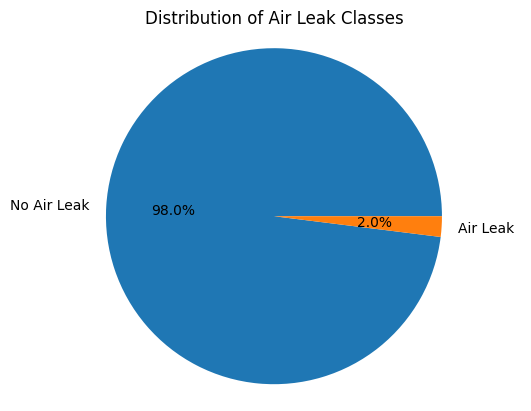

In [16]:
counts=df['Air_Leak'].value_counts()
labels=['No Air Leak', 'Air Leak']
sizes = counts.values


plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal') 
plt.title('Distribution of Air Leak Classes')



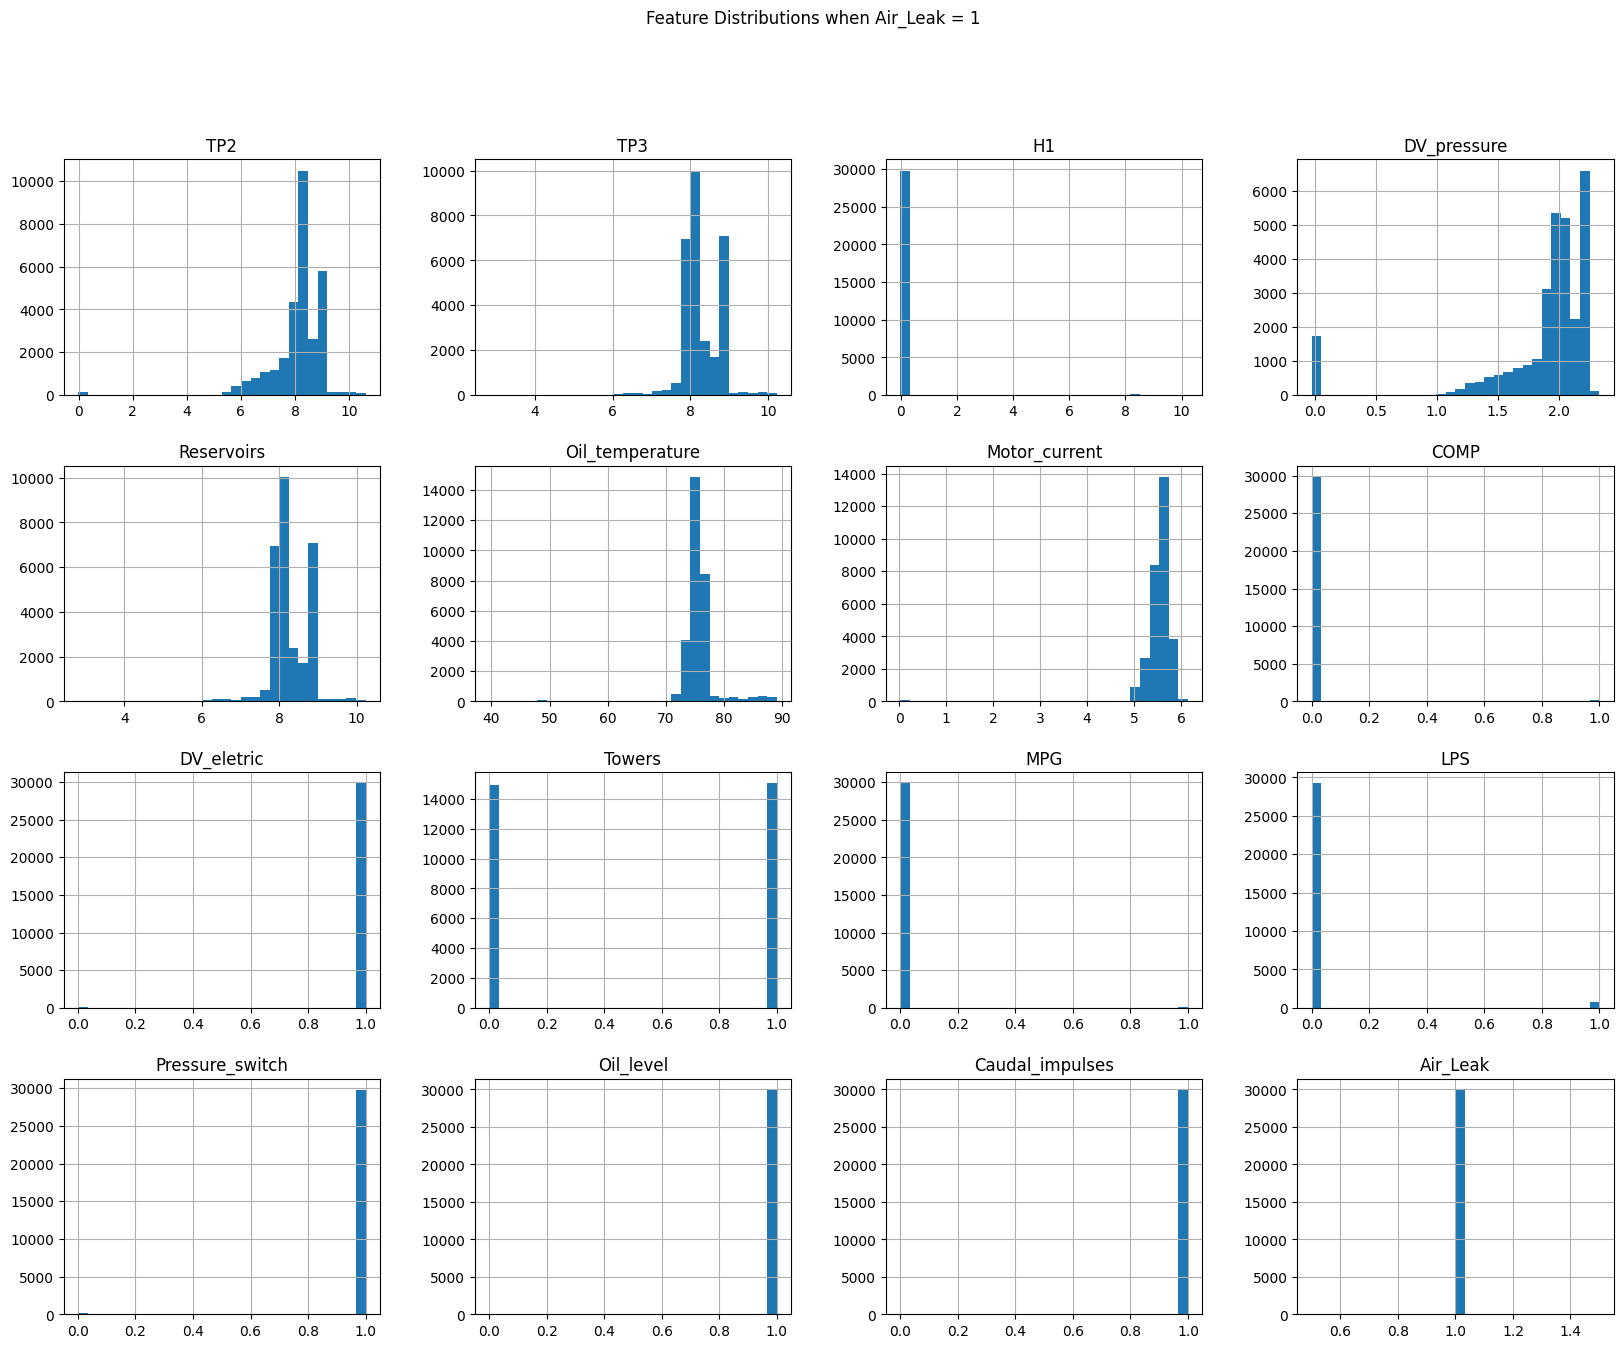

In [17]:
airdata=df[df["Air_Leak"]==1]
airdata.hist(bins=30, figsize=(20, 15))
plt.suptitle('Feature Distributions when Air_Leak = 1')
plt.show()

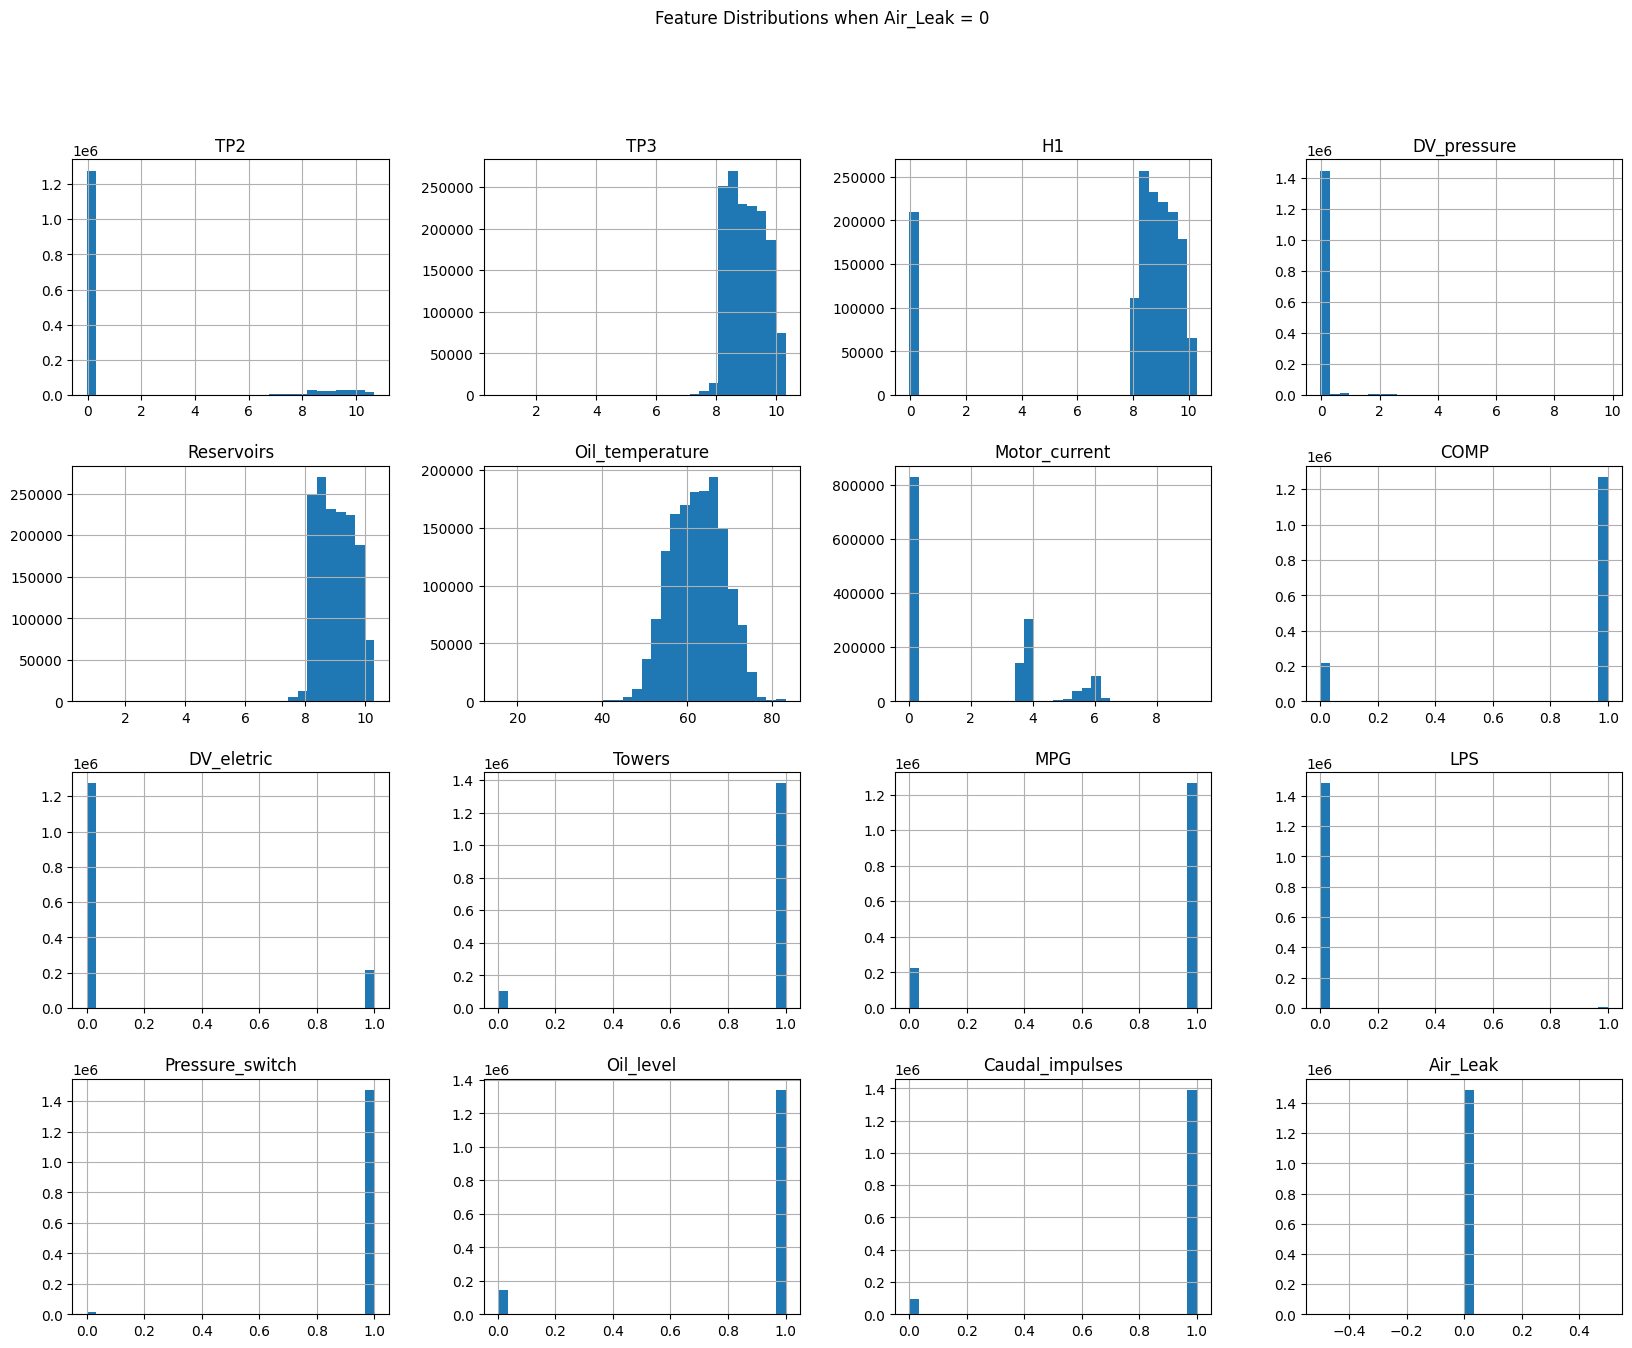

In [18]:
df[df["Air_Leak"]==0].hist(bins=30, figsize=(20, 15))
plt.suptitle('Feature Distributions when Air_Leak = 0')
plt.show()

Correlation with 'Air_Leak':
 Air_Leak           1.00
DV_pressure        0.67
DV_eletric         0.32
TP2                0.29
Oil_temperature    0.28
Motor_current      0.21
LPS                0.05
Oil_level          0.05
Caudal_impulses    0.04
Pressure_switch    0.01
TP3               -0.15
Reservoirs        -0.15
Towers            -0.22
MPG               -0.31
H1                -0.32
COMP              -0.32
Name: Air_Leak, dtype: float64


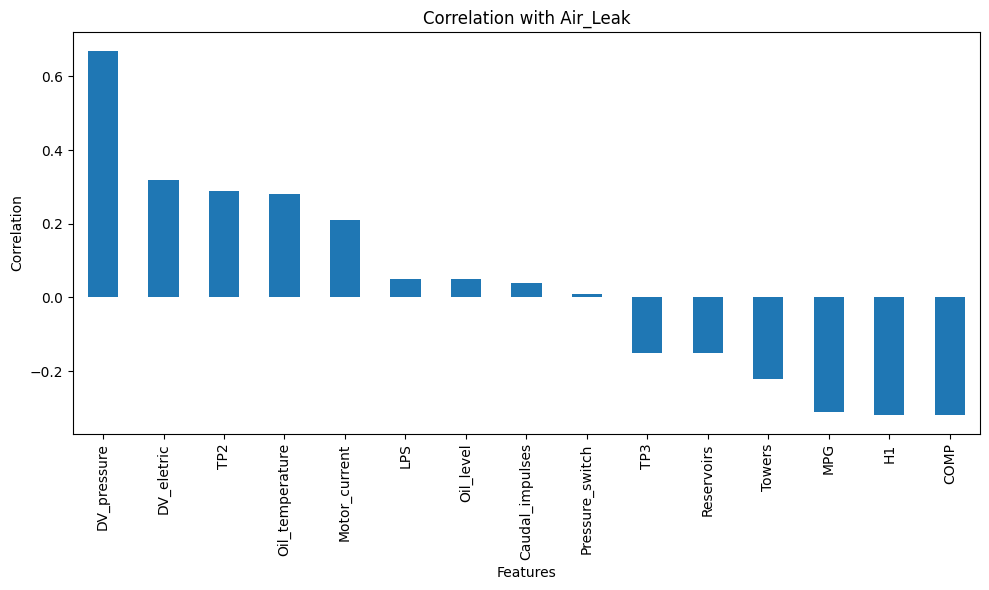

In [19]:
corr_matrix = df.corr().round(2)
air_leak_corr = corr_matrix["Air_Leak"].sort_values(ascending=False)
print("Correlation with 'Air_Leak':\n", air_leak_corr)

plt.figure(figsize=(10, 6))
air_leak_corr.drop('Air_Leak').plot(kind='bar')
plt.title("Correlation with Air_Leak")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.tight_layout()
plt.savefig("../images/air_leak_corr.jpg")
plt.show()


In [33]:
def visualize(features):
    for feature in features:
        plt.figure(figsize=(20,5))
        plt.plot(df[feature], label=feature)
        for start, end in air_leak_instance:
            plt.axvline(pd.to_datetime(start), color='red', linestyle='--', label='Air Leak Start')
            plt.axvline(pd.to_datetime(end), color='orange', linestyle='--', label='Air Leak End')
        plt.xlabel("timestamp")
        plt.ylabel(feature)
        plt.title(f"{feature} timestamp visualization")
        plt.show()

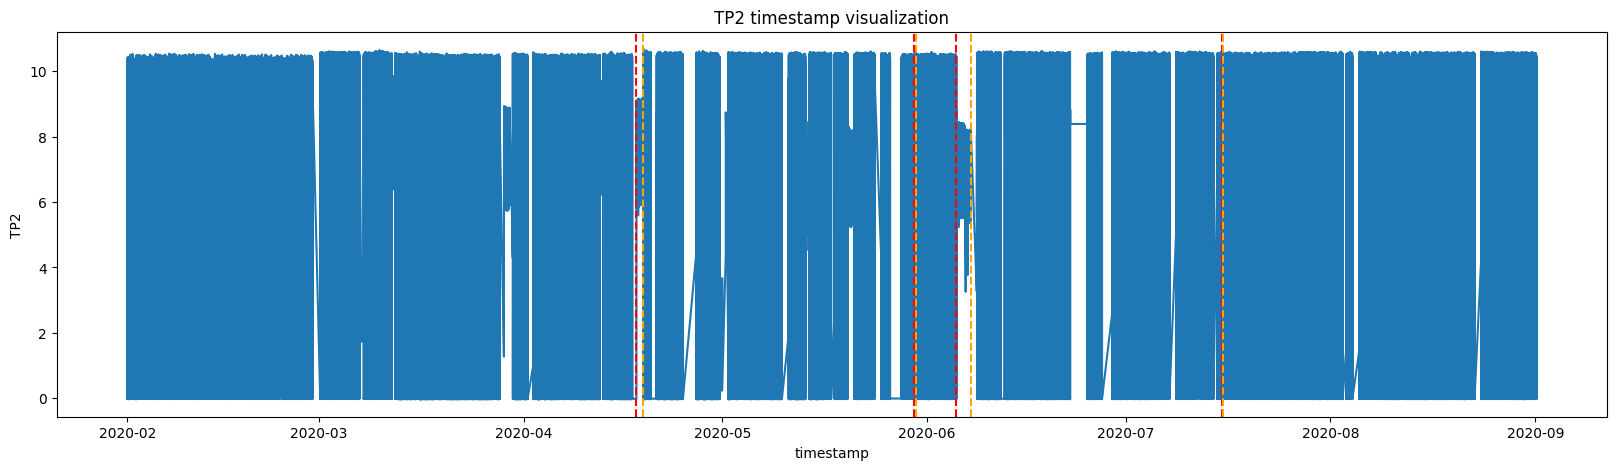

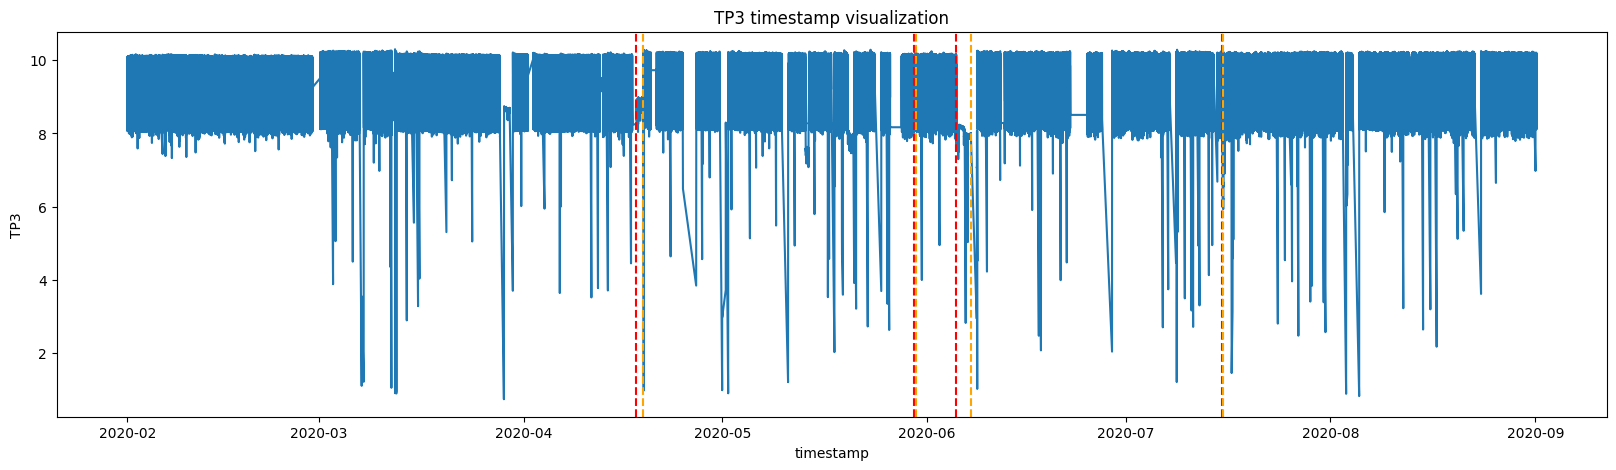

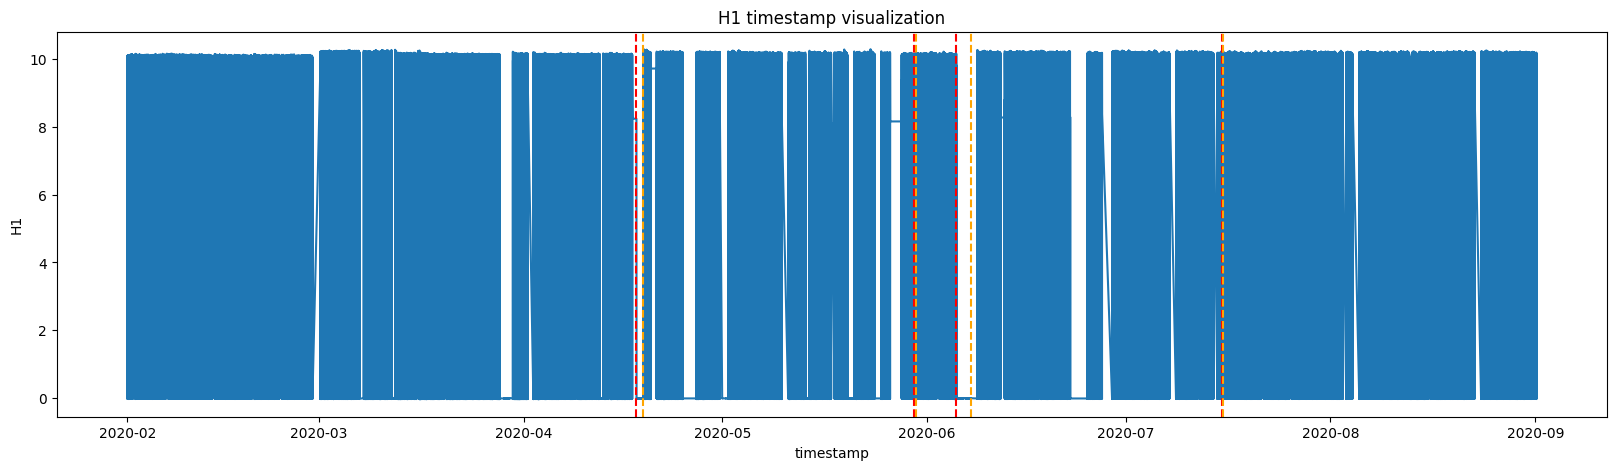

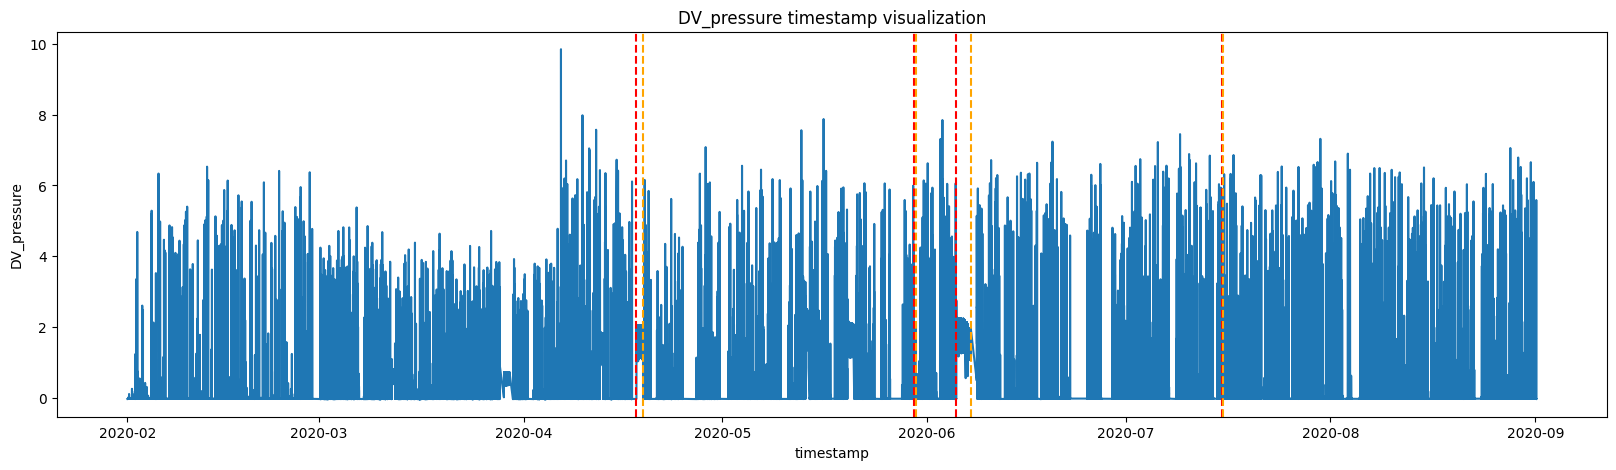

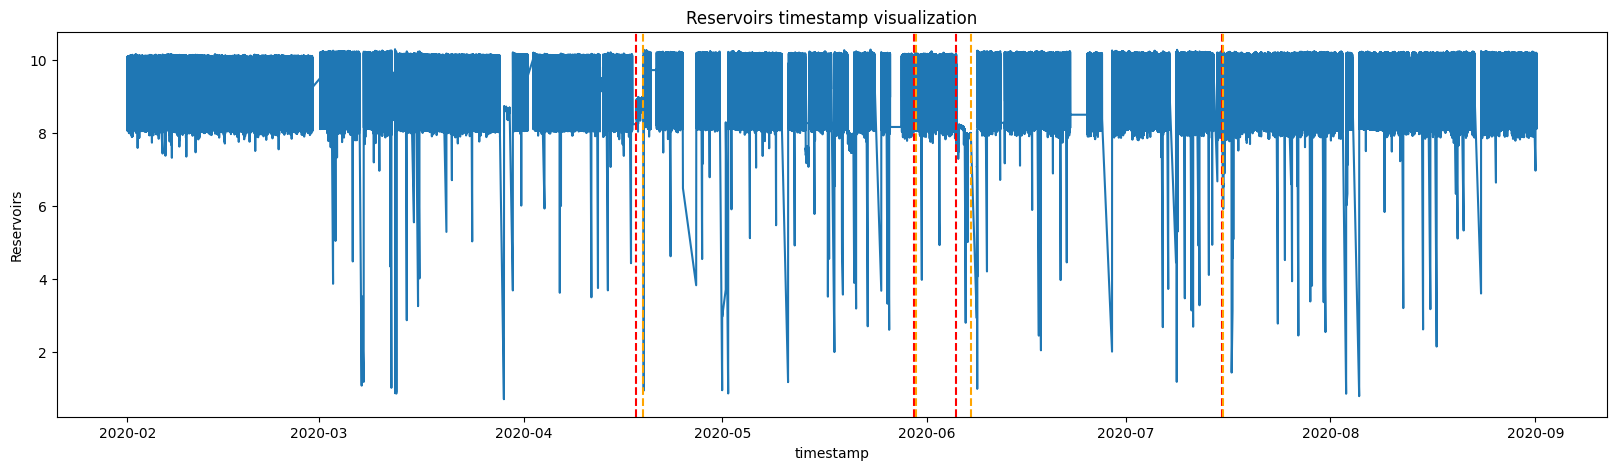

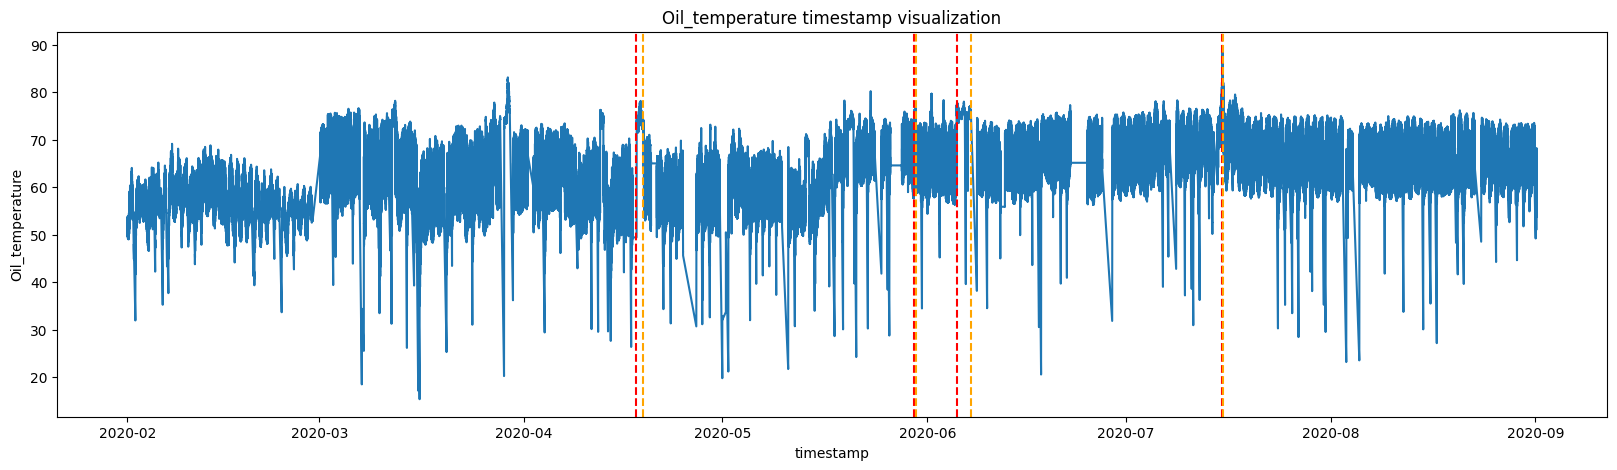

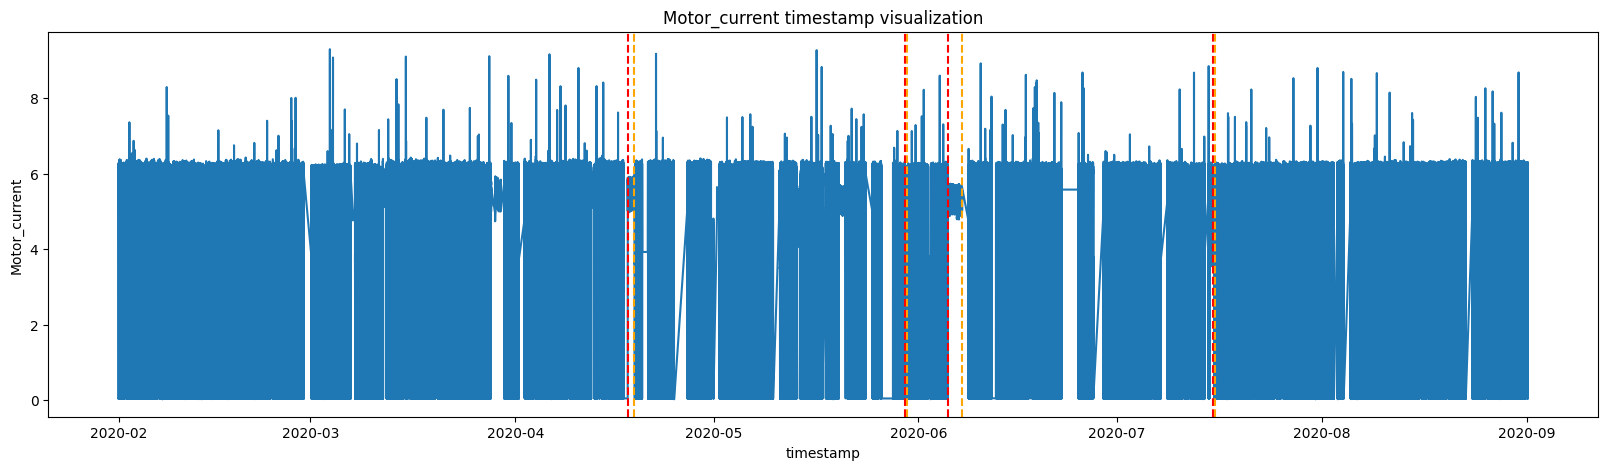

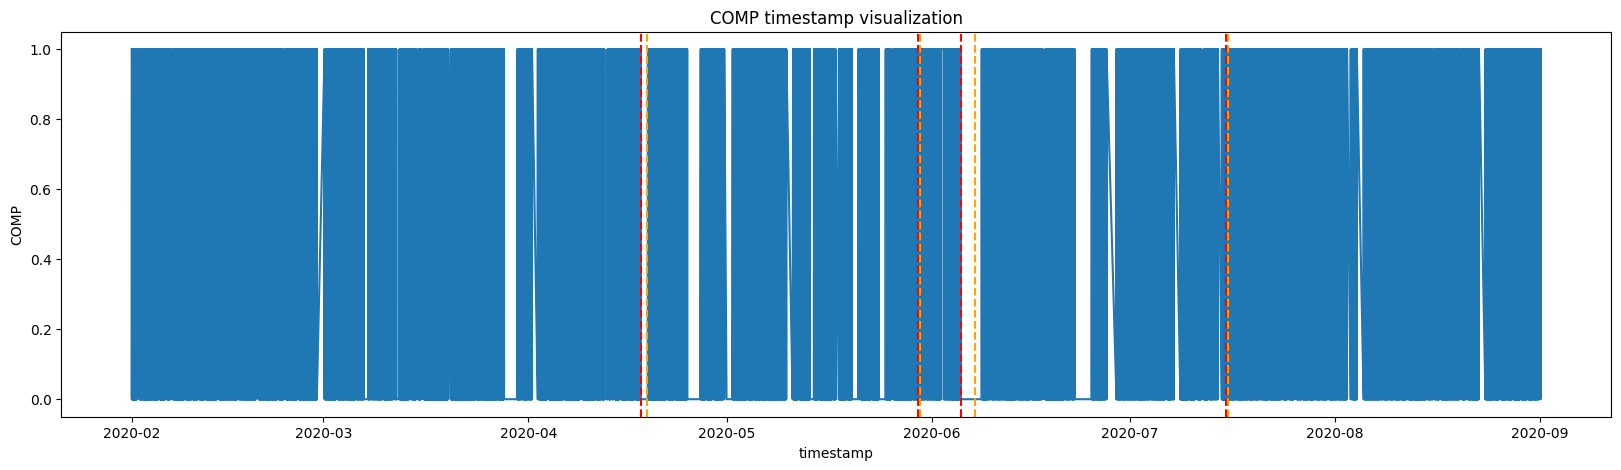

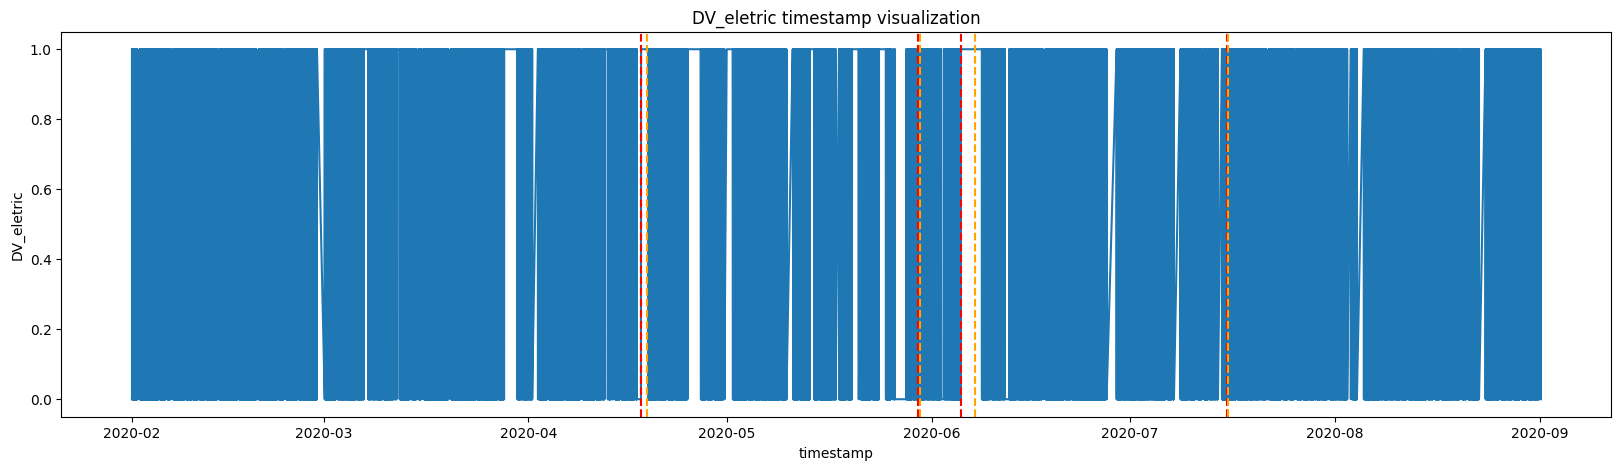

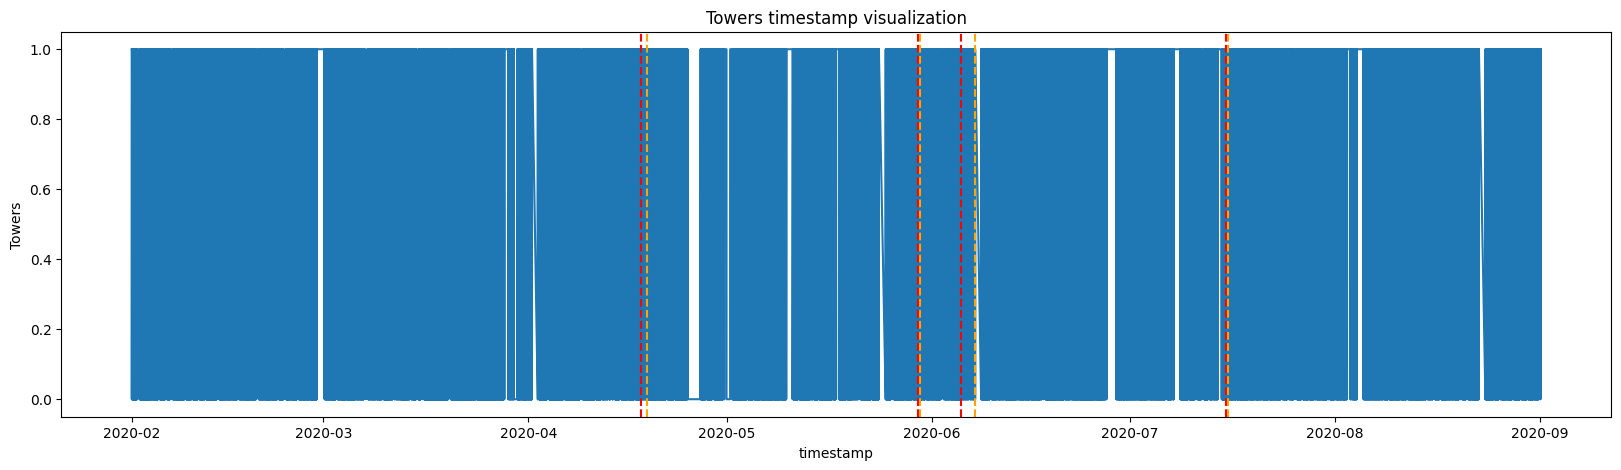

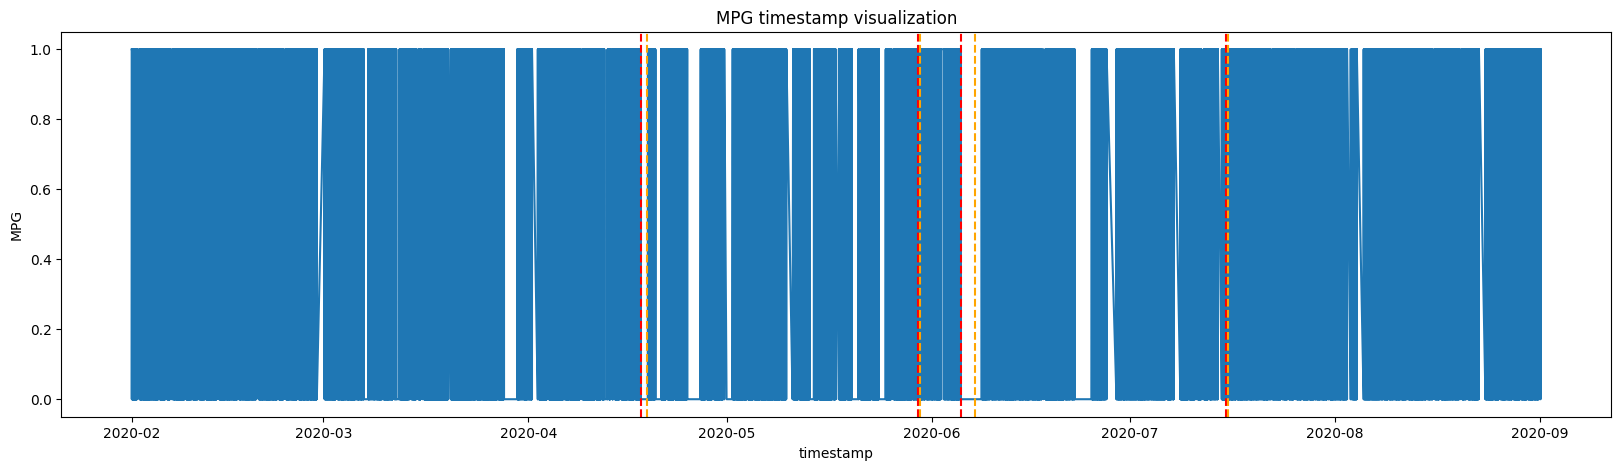

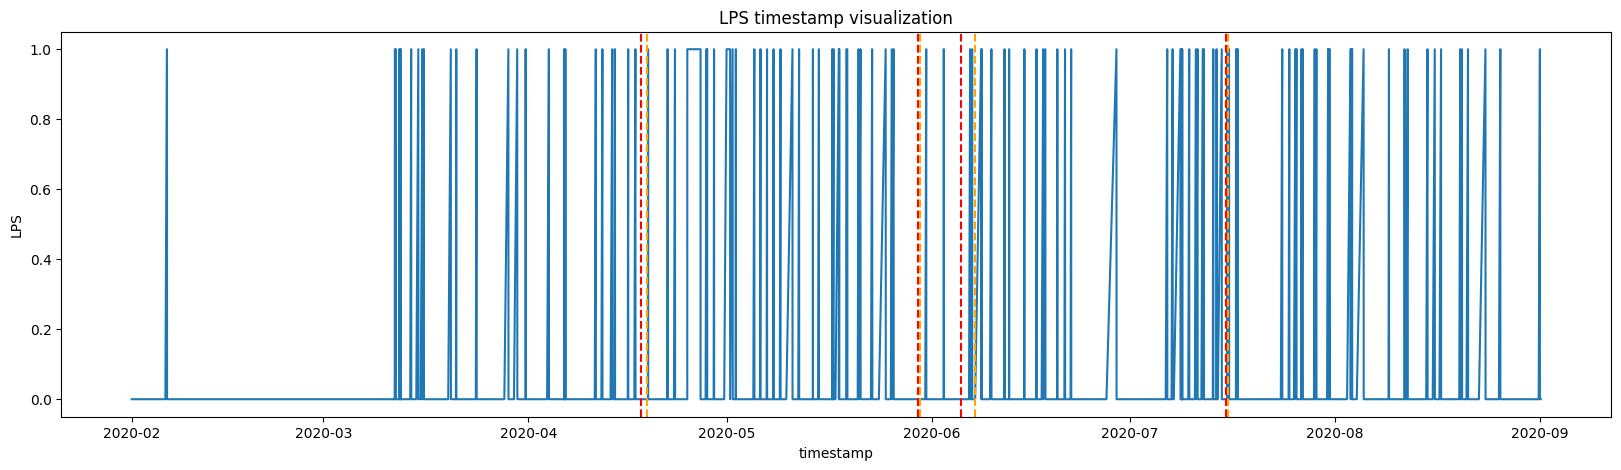

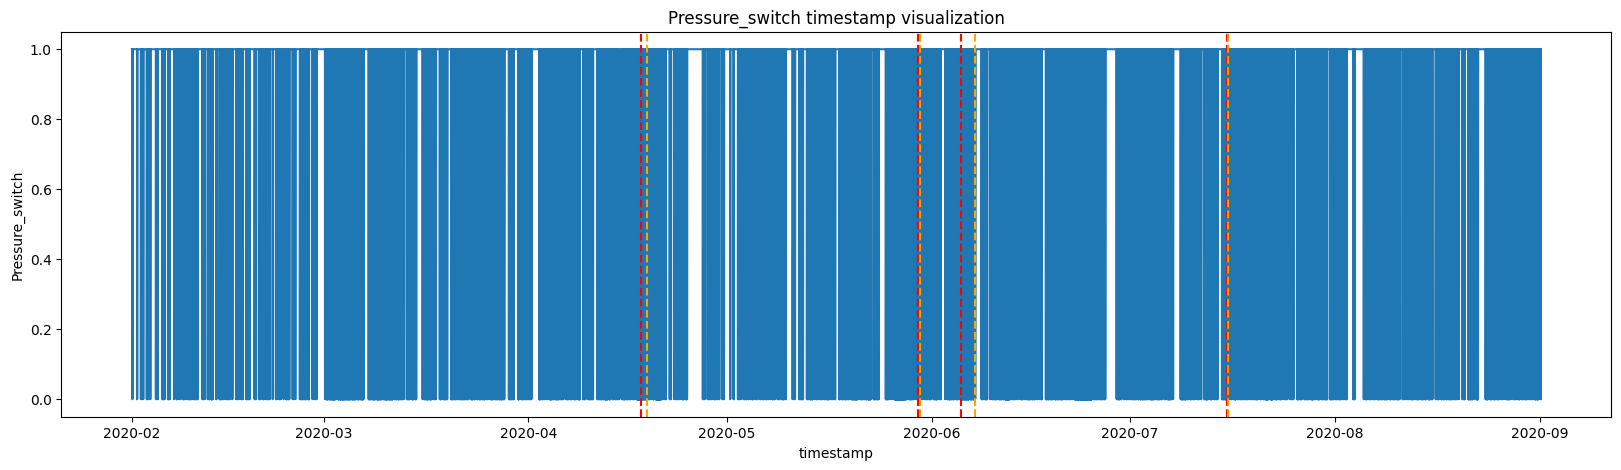

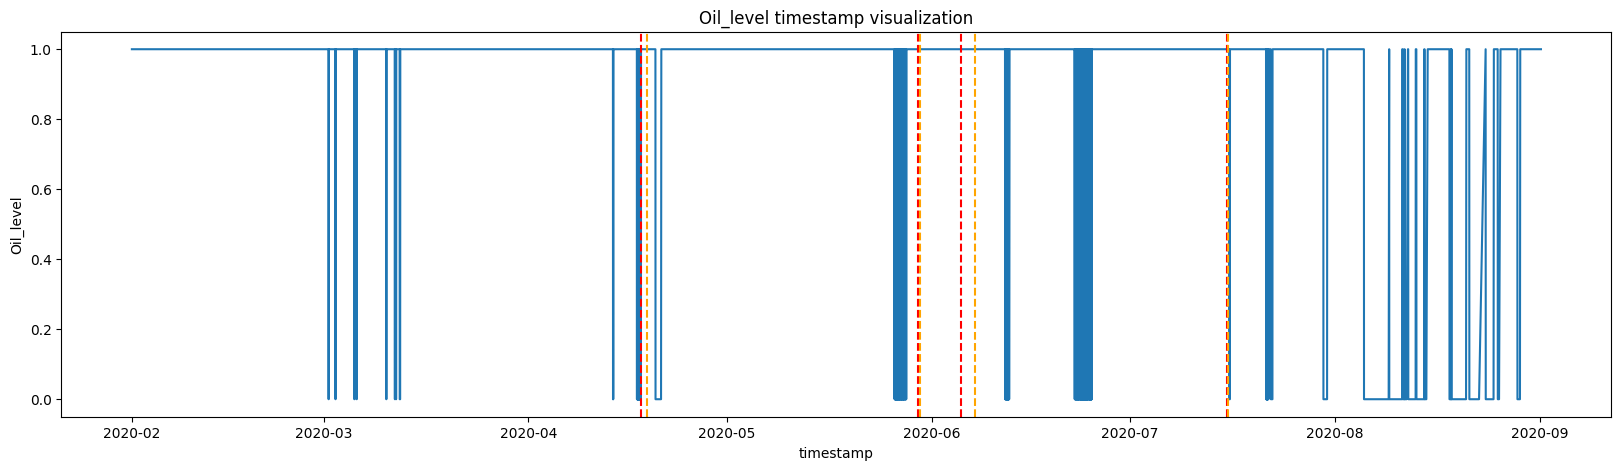

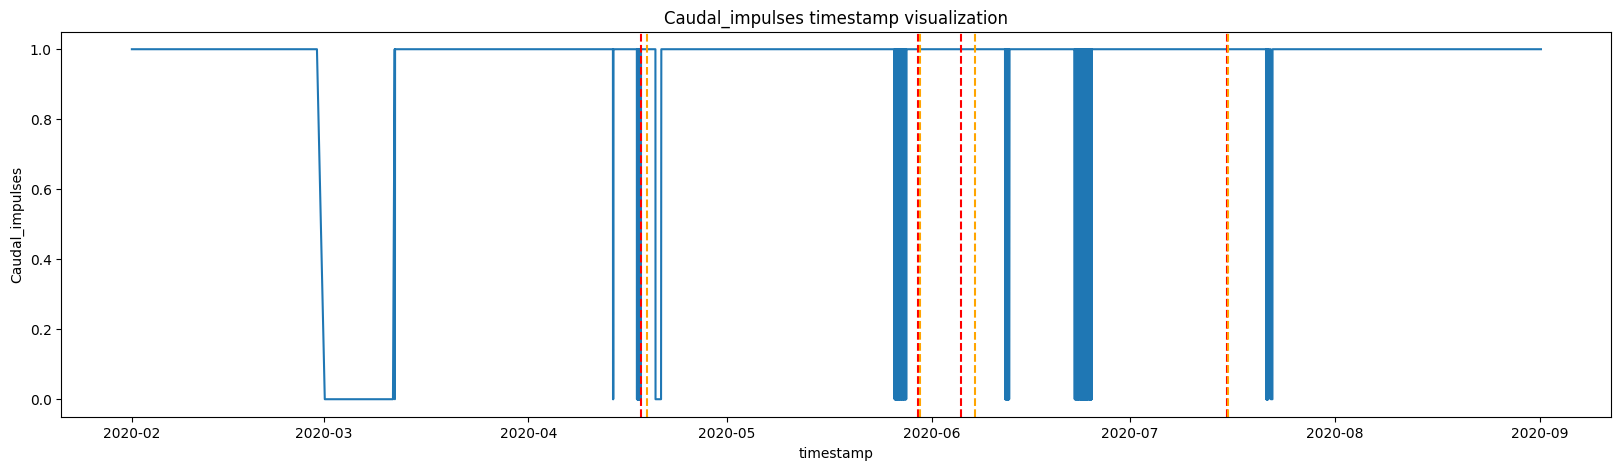

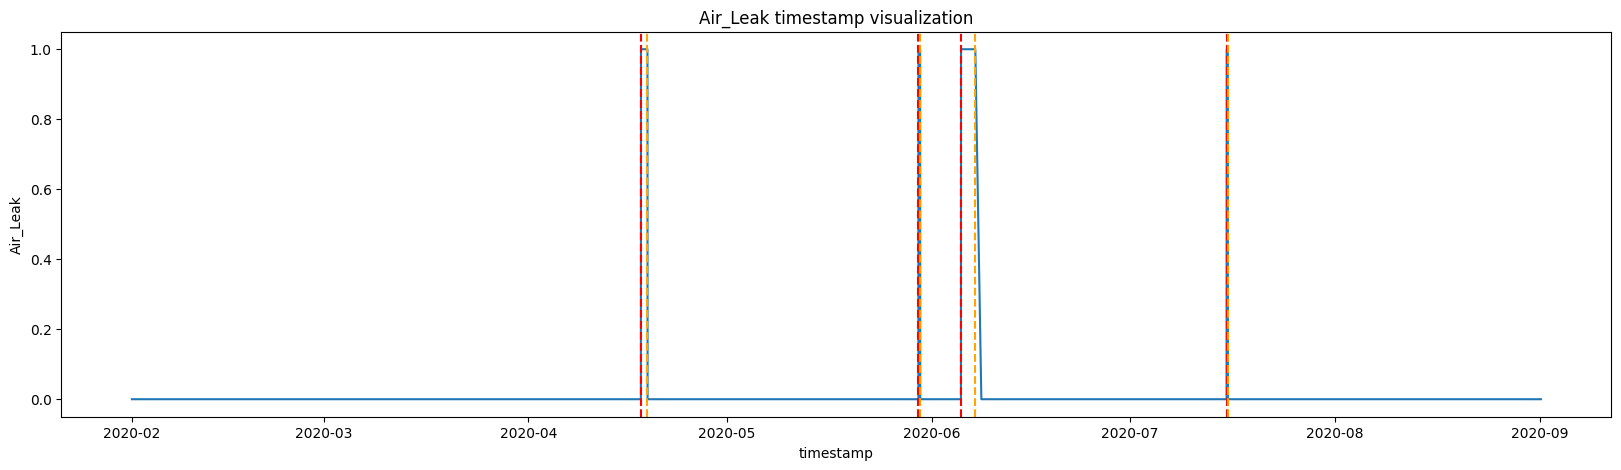

In [34]:
feature=df.columns.tolist()
feature
visualize(feature)

In [22]:
def visualize_density(features,df):
    df[features].plot(kind='kde',
                      subplots=True,
                      layout=(len(features) // 3 + 1, 3),
                      figsize=(22, 6 * len(features) // 3),
                      fontsize=10, 
                      linewidth=2,
                      sharex=False,
                      title='Visualization of the original Time Series')
    plt.show()

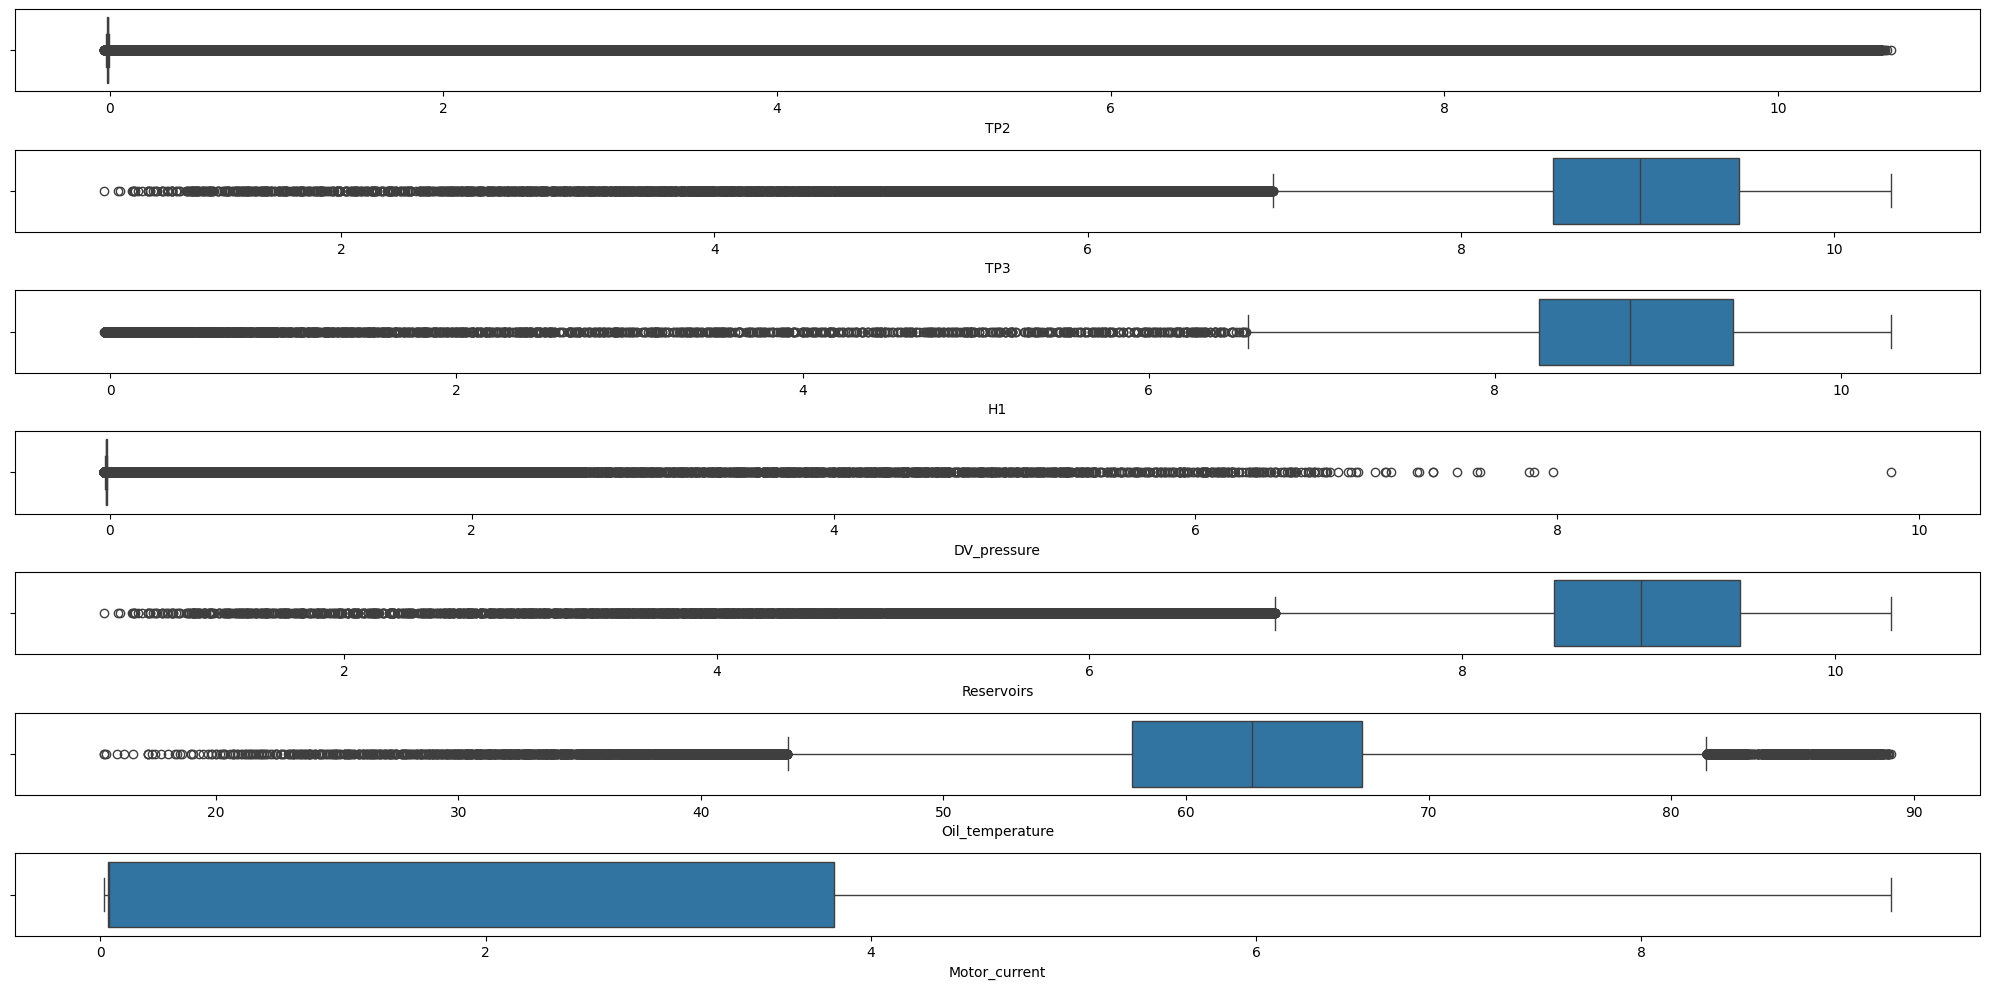

In [23]:
#contisnus varibale boxplot
fig, ax = plt.subplots(7,1, figsize=(20, 10))
for i, col in enumerate(df.columns[:7]):
    sns.boxplot(data=df, x=col, ax=ax.ravel()[i])
    ax.ravel()[i].set_xlabel(col) 
plt.tight_layout()  

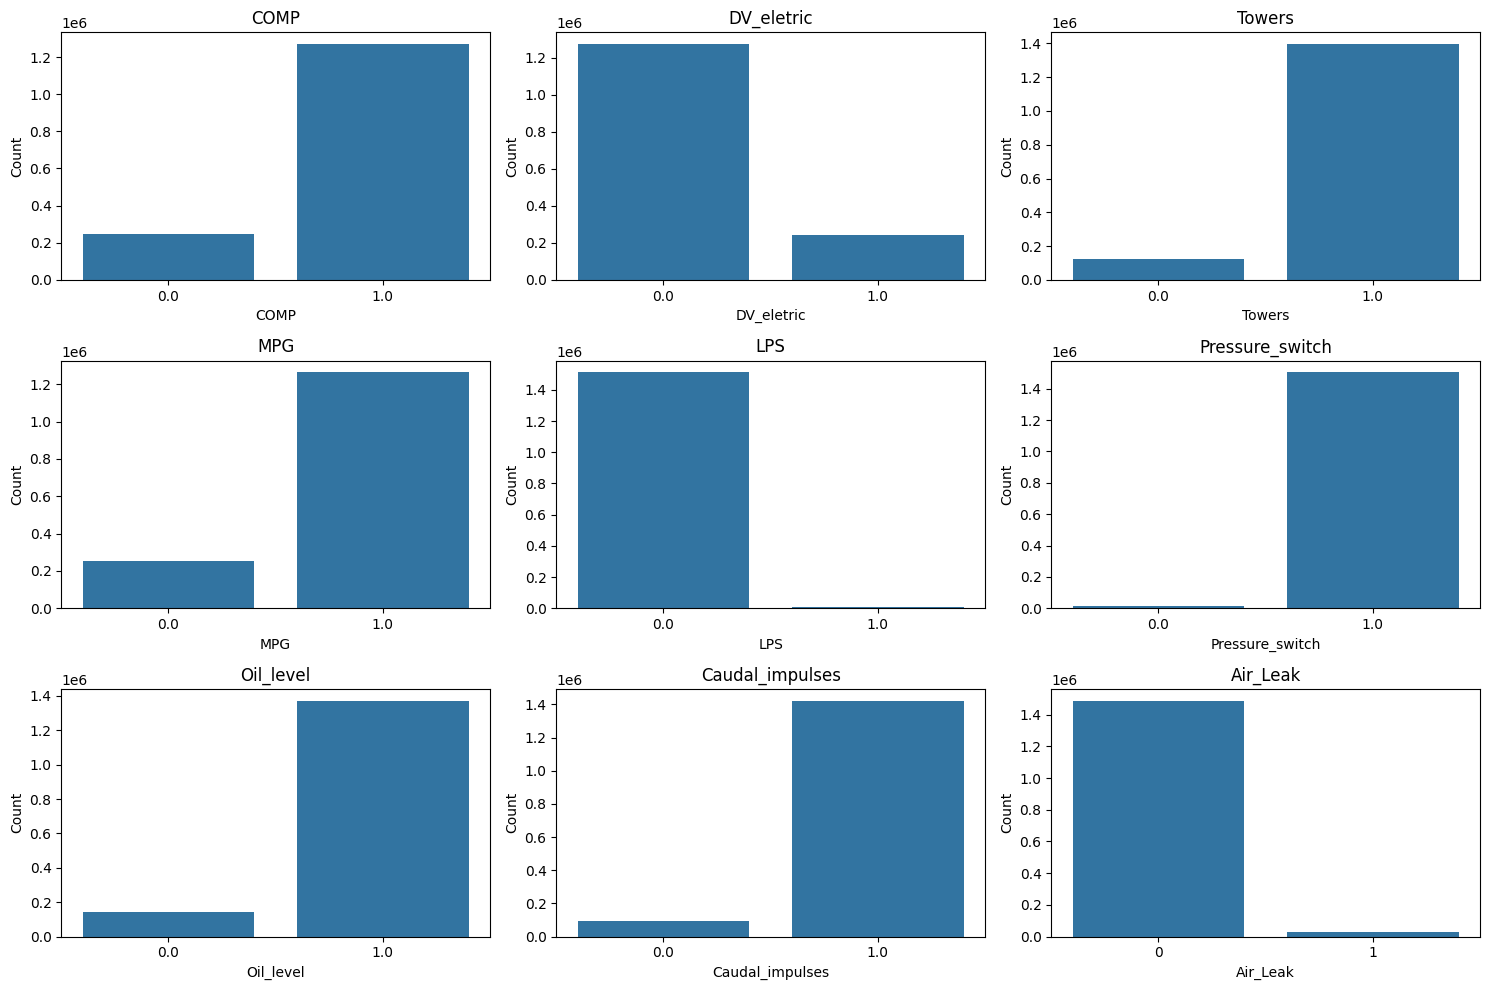

In [24]:
#categoraical_columns
fig,ax =plt.subplots(3,3,figsize=(15,10))
ax=ax.flatten()
#print(fig,ax)
for i , col in enumerate(df.columns[7:]):
    sns.countplot(data=df,  x=col, ax=ax[i])
    ax[i].set_title(f'{col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

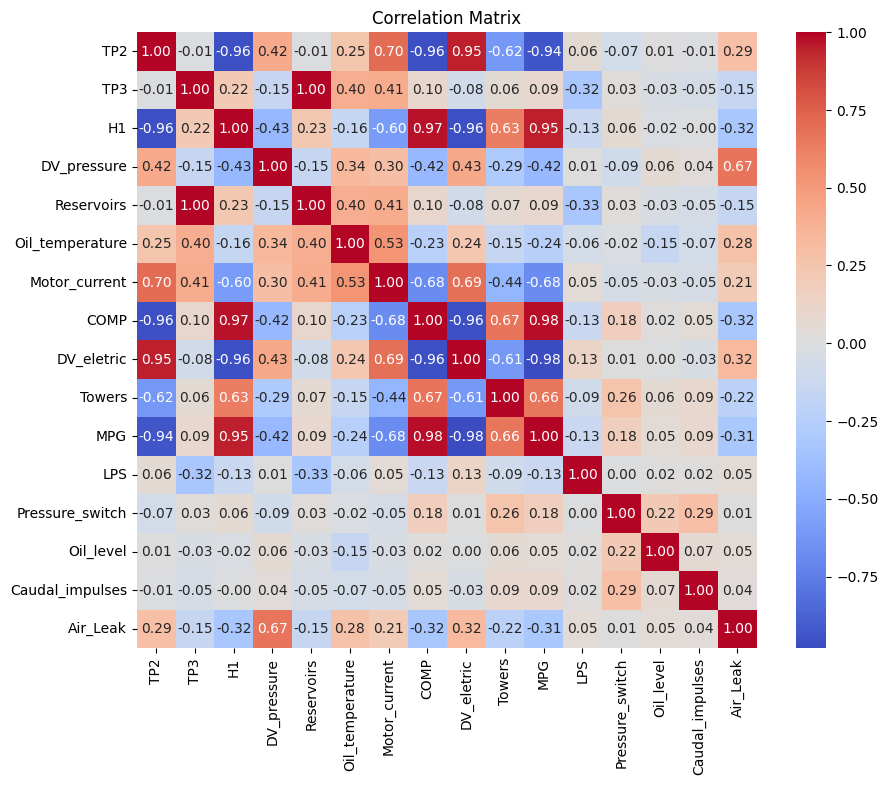

In [25]:
corr_matrix = df.corr().round(2)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Matrix")
plt.savefig("../images/corr_matrix.jpg", bbox_inches='tight')
plt.show()


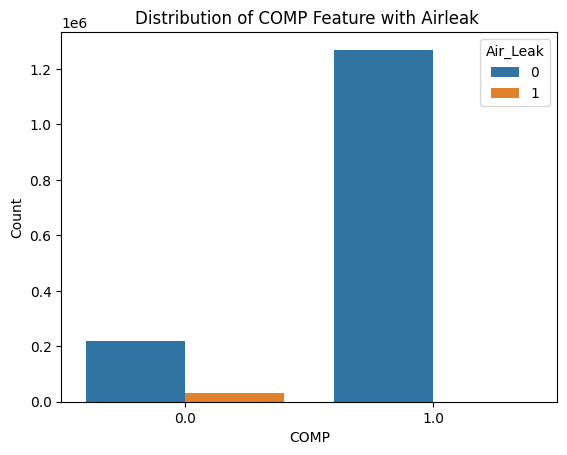

In [37]:
sns.countplot(data=df,x=df['COMP'],hue=df['Air_Leak'])
plt.title('Distribution of COMP Feature with Airleak ')
plt.ylabel('Count')
plt.xlabel('COMP')
plt.show()
    

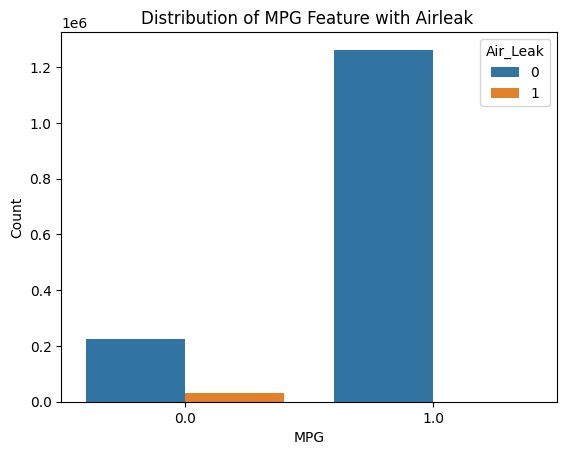

In [38]:
sns.countplot(data=df,x=df['MPG'],hue=df['Air_Leak'])
plt.title('Distribution of MPG Feature with Airleak ')
plt.ylabel('Count')
plt.xlabel('MPG')
plt.show()
    

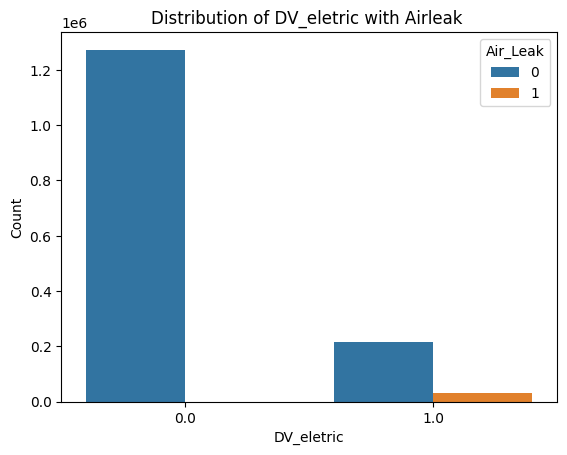

In [27]:
sns.countplot(data=df,x=df['DV_eletric'],hue=df['Air_Leak'])
plt.title('Distribution of DV_eletric with Airleak ')
plt.ylabel('Count')
plt.xlabel('DV_eletric')
plt.show()
    

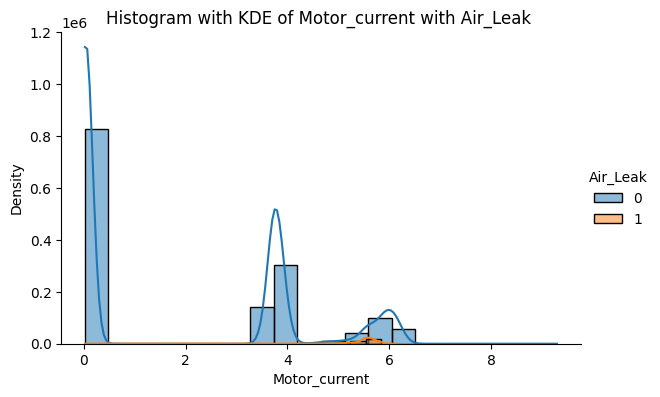

In [28]:
g = sns.FacetGrid(df, hue="Air_Leak",height=4, aspect=1.5)
g.map(sns.histplot,'Motor_current', bins=20, kde=True)
g.add_legend()
plt.title('Histogram with KDE of Motor_current with Air_Leak ')
plt.ylabel('Density')
plt.xlabel('Motor_current')
plt.show()

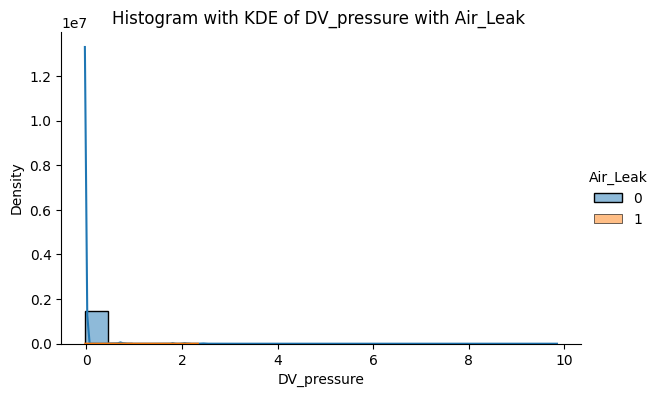

In [40]:
g = sns.FacetGrid(df, hue="Air_Leak",height=4, aspect=1.5)
g.map(sns.histplot,'DV_pressure', bins=20, kde=True)
g.add_legend()
plt.title('Histogram with KDE of DV_pressure with Air_Leak ')
plt.ylabel('Density')
plt.xlabel('DV_pressure')
plt.show()


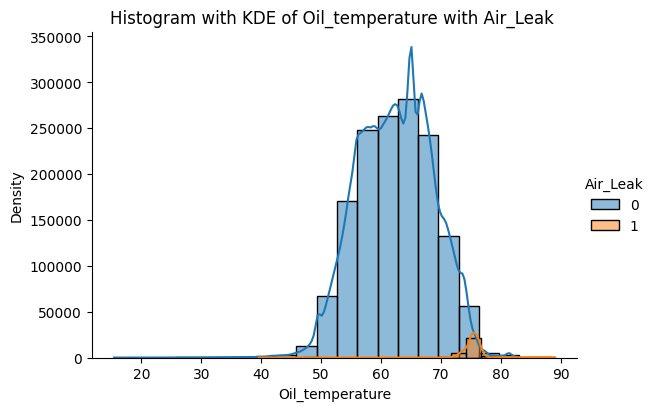

In [30]:
g = sns.FacetGrid(df, hue="Air_Leak",height=4, aspect=1.5)
g.map(sns.histplot,'Oil_temperature', bins=20, kde=True)
g.add_legend()
plt.title('Histogram with KDE of Oil_temperature with Air_Leak ')
plt.ylabel('Density')
plt.xlabel('Oil_temperature')
plt.show()


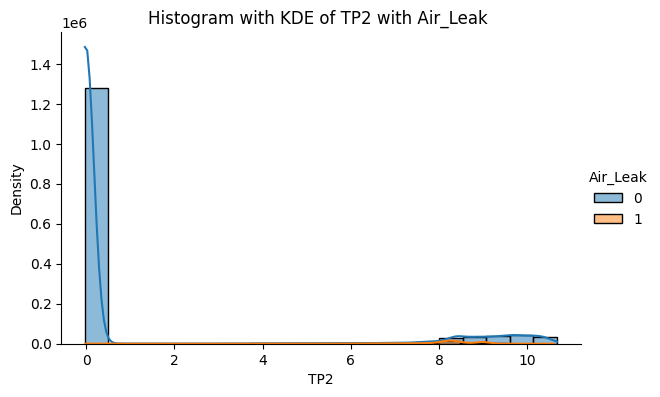

In [31]:
g = sns.FacetGrid(df, hue="Air_Leak",height=4, aspect=1.5)
g.map(sns.histplot,'TP2', bins=20, kde=True)
g.add_legend()
plt.title('Histogram with KDE of TP2 with Air_Leak ')
plt.ylabel('Density')
plt.xlabel('TP2')
plt.show()


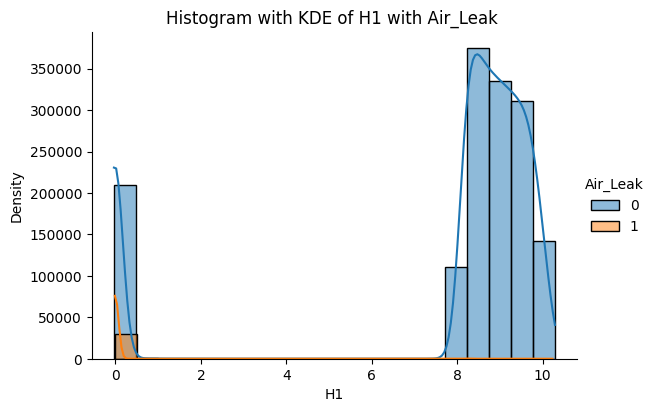

In [36]:
g = sns.FacetGrid(df, hue="Air_Leak",height=4, aspect=1.5)
g.map(sns.histplot,'H1', bins=20, kde=True)
g.add_legend()
plt.title('Histogram with KDE of H1 with Air_Leak ')
plt.ylabel('Density')
plt.xlabel('H1')
plt.show()
